<a href="https://colab.research.google.com/github/mynxdy/D.D.D/blob/main/0724%20minyeong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Drowsiness Driving Detection 운전자 졸음 방지**

dataset
https://www.kaggle.com/datasets/dheerajperumandla/drowsiness-dataset

참고
https://ys-cs17.tistory.com/24

### 0723

이미지 불러와서 저장할 공간 생성

이미지 전처리

모델 공부

In [ ]:
#가보자고

In [ ]:
import numpy as np
import pandas as pd

import os
import cv2


labels

In [ ]:
from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

In [ ]:
labels = os.listdir("/content/drive/MyDrive/22-1 숙탯2기딥러닝/train")   #os.listdir은 파일 경로없이 디렉토리의 모든 파일을 나열
labels = labels 
labels              

['no_yawn', 'yawn', 'Open', 'Closed']

visualize random 1 image

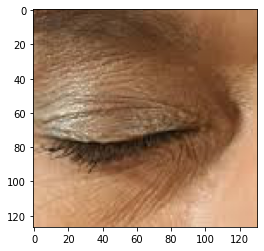

In [ ]:
import matplotlib.pyplot as plt

#closedEye
plt.imshow(plt.imread("/content/drive/MyDrive/22-1 숙탯2기딥러닝/train/Closed/_10.jpg"))

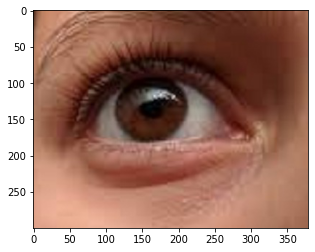

In [ ]:
#openEye
plt.imshow(plt.imread("/content/drive/MyDrive/22-1 숙탯2기딥러닝/train/Open/_100.jpg"))

image array & image shape

In [ ]:
a = plt.imread("/content/drive/MyDrive/22-1 숙탯2기딥러닝/train/Closed/_10.jpg")
a.shape                                                                          #결과는 (127,131,3)으로 가로 127,세로131,컬러이기 때문에 3이 나왔습니다.

(127, 131, 3)

for closed and open eye

In [ ]:
#컬러로 읽어온 이미지의 크기를 재정의하여 인덱스와 함께 리스트에 저장하는 함수

def get_data(dir_path="/content/drive/MyDrive/22-1 숙탯2기딥러닝/train/"):

    labels = ['Closed', 'Open']
    IMG_SIZE = 145    
    data = []         #이미지와 인덱스를 넣을 공간


    for label in labels:
        path = os.path.join(dir_path, label)      #path는 /content/drive/MyDrive/22-1 숙탯2기딥러닝/train/Closed(Open)이 됩니다.
        class_num = labels.index(label)           #Closed의 인덱스는 0, Open의 인덱스는 1입니다.
        class_num +=2                             #각각의 인덱스에 2를 더해준 것은 이전에 하품을 하거나 하지 않은 경우의 인덱스가 0,1이기 때문입니다.
        print(class_num)      #인덱스 출력

        for img in os.listdir(path):              #Closed와 Open 안의 이미지 파일 이름을 의미합니다.
           
            #이걸 실행하고
            try:                        
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)  #이미지 파일을 컬러로 읽은 다음 변수에 저장
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))        #읽어들인 이미지의 크기를 (145,145)로 변경
                data.append([resized_array, class_num])                            #데이터를 저장할 공간에 사이즈를 바꾼 이미지와 인덱스를 저장

            #오류가 나면 이걸 실행해라
            except Exception as e:      
                print(e)

    return data


In [ ]:
data_train = get_data()                   #Closed의 인덱스 : 2, Open의 인덱스 : 3

2
3


separate label and features

In [ ]:
X = []          #독립변수; 모델링에 넣어야 할 feature 값
y = []          #종속변수; 눈을 떴는지, 감았는지에 대한 label을 넣어야겠군
for feature, label in data_train:
    X.append(feature)
    y.append(label)

In [ ]:
X = np.array(X)   #이미지 데이터 처리를 위해 클래스 객체를 Numpy배열로 변환합니다.
X.shape           #(총 이미지 개수, 가로, 세로, 컬러)

(1452, 145, 145, 3)

reshape the array

In [ ]:
X = np.array(X)
X = X.reshape(-1,145,145,3)    #3차원 배열을 1차원 배열로 변경하기 위해 첫 번째 인자에 -1을 넣어줍니다.

LabelBinarizer

In [ ]:
y

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_bin = LabelBinarizer()    #이진 레이블로 변환시키는 라이브러리
y = label_bin.fit_transform(y)

label array

In [ ]:
y = np.array(y)     #array배열로 변환
                    #list에서는 shape을 확인할 수 없기 때문에 array로 변환

In [ ]:
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

train test split

In [ ]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

length of X

In [ ]:
len(X_test)

436

In [ ]:
len(X_train)

1016

length of y

In [ ]:
len(y_test)

436

In [ ]:
len(y_train)

1016

shape of X & y

In [ ]:
X_train.shape    #1016개의 데이터, width=145, height=145, channel=3

(1016, 145, 145, 3)

In [ ]:
y_train.shape    #1016개의 데이터, 각각 라벨링 되어잇음

(1016, 1)

grayscale

In [ ]:
#흑백처리?

numpy to tensor

In [ ]:
###numpy로 되어 있는 데이터를 tensor를 GPU 연산을 위해 torch.from_numpy()를 이용해 tensor로 변환

from torch.utils.data import Dataset
import torch


class eyes_dataset(Dataset):
    def __init__(self, x_file_paths, y_file_path, transform=None):
        self.x_files = x_file_paths
        self.y_files = y_file_path
        self.transform = transform

    def __getitem__(self, idx):
        x = self.x_files[idx]
        x = torch.from_numpy(x).float()

        y = self.y_files[idx]
        y = torch.from_numpy(y).float()

        return x, y

    def __len__(self):
        return len(self.x_files)

In [ ]:
from torchvision.transforms import transforms

train_transform = transforms.Compose([
    transforms.ToTensor(),  #tensor로 변경해주는 라이브러리
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
])


train_dataset = eyes_dataset(X_train, y_train, transform=train_transform)

### 0730
train 데이터 모델 돌려보기

### 0716

In [ ]:
##data_loader.py##

from torch.utils.data import Dataset
import torch


class eyes_dataset(Dataset):
    def __init__(self, x_file_paths, y_file_path, transform=None):
        self.x_files = x_file_paths
        self.y_files = y_file_path
        self.transform = transform

    def __getitem__(self, idx):
        x = self.x_files[idx]
        x = torch.from_numpy(x).float()

        y = self.y_files[idx]
        y = torch.from_numpy(y).float()  #GPU 연산을 위해 자료형을 tensor로 변환

        return x, y

    def __len__(self):
        return len(self.x_files)


#제가 찾은 예제에서 x_file과 y_file은 형식이 npy라는 확장자를 가진 이미지입니다.
#npy는 numpy 자료형으로 이미지를 저장합니다.

# x_file의 shape은 (2586,26,34,1) -> 2586개 데이터의 width=26, height=34, channel=1로 구성됩니다.
# y_file의 shape은 (2586, 1) -> 2586개의 데이터 각각에 라벨링이 있습니다.
  # 라벨링은 눈을 감으면 0, 뜨면 1로 구성됩니다.

In [ ]:
##model.py##

import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # 1. Conv2d(input_channel_size, output_volume_size, kernel_size)
        
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        # 흑백 1장, 채널 수는 32, 채널 크기는 3
        # 결과 : 32개의 필터(채널)은 32개의 특징맵 생성
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        # covn2에서 64개의 필터(채널)은 각각 conv1에서 나온 32개의 특징맵을 보고 다시 1개의 특징맵을 생성 → 총 64개의 특징맵 생성
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        # conv3도 마찬가지

        # 2. activation
        self.fc1 = nn.Linear(1536, 512)
        self.fc2 = nn.Linear(512, 1)

    def forward(self, x):
        # 3. pool
        x = F.max_pool2d(F.relu(self.conv1(x)),2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2)
        x = x.reshape(-1, 1536)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)


        return x


# model은 binary classification / 눈을 감으면 0, 뜨면 1
# Conv, activation, pool의 3번의 과정을 거쳐 2번의 linear layer을 통해 최종적인 값이 나옴
# 이 최종적인 값으로 loss를 구하고, Probability를 구해 boundary를 0.5로 잡고 눈을 감았는지 떴는지 판단

# 컨브넷은 (image_height, image_width, image_channels) 크기의 입력 텐서 사용
    # 여기서는 input_shape=(26,34,1)임


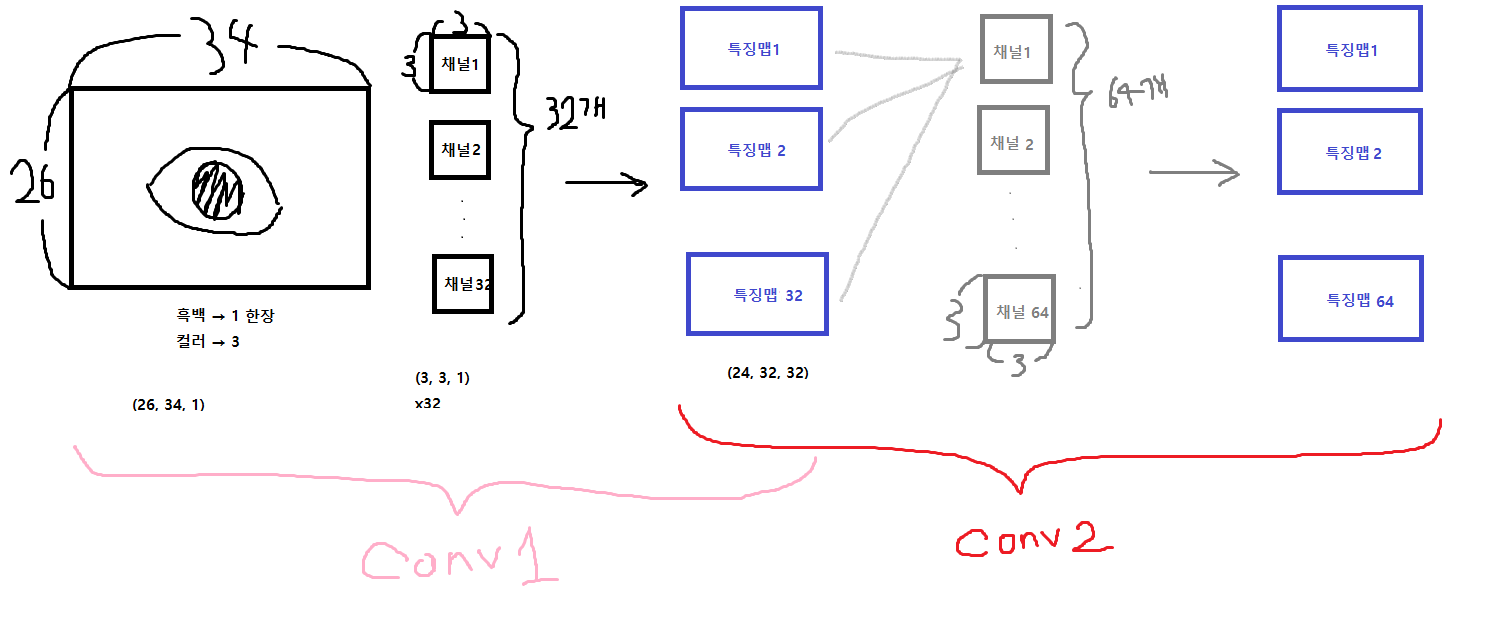

In [ ]:
model = Net().to('cuda')
summary(model, (1,26,34))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 34]             320
            Conv2d-2           [-1, 64, 13, 17]          18,496
            Conv2d-3            [-1, 128, 6, 8]          73,856
            Linear-4                  [-1, 512]         786,944
            Linear-5                    [-1, 1]             513
Total params: 880,129
Trainable params: 880,129
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.37
Params size (MB): 3.36
Estimated Total Size (MB): 3.74
----------------------------------------------------------------
